<a href="https://colab.research.google.com/github/MonishSoundarRaj/data_check_generator/blob/main/JSSPP_Plots_and_Metrics_tvae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn
import pandas as pd
from datetime import datetime
from collections import Counter, defaultdict
import json
from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
bw_df = pd.read_csv("blue_waters_data_training.csv")
philly_df = pd.read_csv("philly_data_training.csv")
hl_df = pd.read_csv("helios_data_training.csv")
th_df = pd.read_csv("theta_data_training.csv")
# Syn_data_below
bw_syn_df = pd.read_csv("./synthetic_data_tvae_bw.csv")
philly_syn_df = pd.read_csv("./synthetic_data_tvae_philly.csv")
helios_syn_df = pd.read_csv("./synthetic_data_tvae_helios.csv")
th_syn_df = pd.read_csv("./synthetic_data_tvae_theta.csv")

In [3]:
# columns=["job", "user", "project", "state", "gpu_num", "cpu_num", "node_num",  "run_time", "wall_time", "new_status", "interval"]

In [4]:
bw_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0,11064,50,60,0,32,1,4.158151,22625,86284,38,Killed
1,1,3235,13,3,0,1024,32,19.556930,173397,172647,27173253,Pass
2,2,5007,25,19,0,64,2,0.000000,25843,86325,38,Pass
3,3,13159,25,17,0,64,2,131.373598,1150,86395,19062970,Pass
4,4,3403,25,19,0,16,2,0.000000,424,28805,12768459,Pass


In [5]:
philly_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0,3336,10,1,1,0,1,2.716897,1229.786983,0,1025.009493,1191.996242,Pass
1,1,10466,69,5,8,0,1,0.000000,1342.892420,0,1627.115432,2594.583870,Failed
2,2,5432,28,5,1,0,1,70.321623,86889.774120,0,127246.536420,151117.342044,Failed
3,3,385,10,1,1,0,1,64.224826,151.942293,0,204.422370,971.599730,Pass
4,4,11000,77,5,8,0,1,0.000000,1.000000,0,563.119755,1260.834048,Failed


In [6]:
helios_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0,10199,59,1,1,1,1,70.597398,1.000000,0,37.906011,0.000000,Failed
1,1,10148,93,5,1,1,1,40.791351,1.000000,0,1.000000,144.529908,Failed
2,2,4239,2,2,8,1,1,33.176394,134.962258,0,43.077009,1233.482840,Killed
3,3,5711,12,1,8,1,1,46.926135,1.000000,0,125.329517,0.000000,Pass
4,4,789,6,4,0,16,1,27.449151,4956.050605,0,1162.536856,705.579111,Pass


In [7]:
th_syn_df.head()

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0,10949,1,1,0,512.0,8.0,115.589859,1772.092626,3573.583708,0.004681,Killed
1,1,10498,1,1,0,384.0,6.0,321.385046,81.020428,3603.508751,7.132090,Pass
2,2,14421,1,1,0,512.0,8.0,147.180051,1171.272192,3604.399118,0.004681,Killed
3,3,4781,15,15,0,512.0,8.0,642.707388,2250.046648,3606.445611,11.632901,Pass
4,4,898,1,1,0,8192.0,128.0,100.103090,27.992375,10840.687915,13.224686,Pass


In [8]:
def plot_cdf(x, bins, xlabel, ylabel="Frequency (%)", color="", linestyle="--"):
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        x = np.sort(x)
        cdf = 100 * np.arange(len(x)) / float(len(x))
        if color:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5, color=color)
        else:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.margins(0)
        plt.ylim(0, 100)
        plt.xlim(10**0, 10**8)
        plt.grid(True)
        plt.style.use("default")

# Core Plots

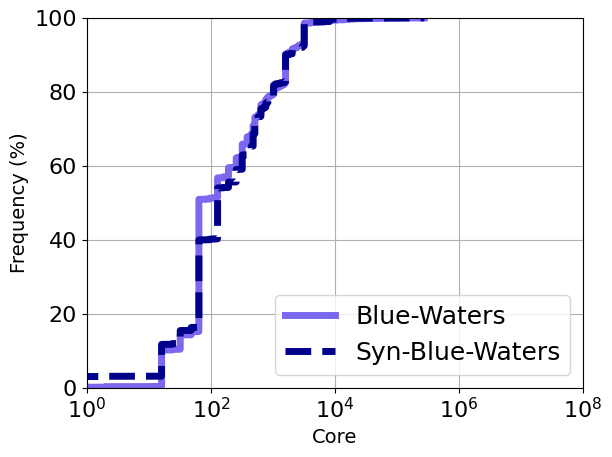

In [9]:
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_df.iterrows()], 100000, "Core", color = "#7B68EE", linestyle="-")
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_syn_df.iterrows()], 100000, "Core", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

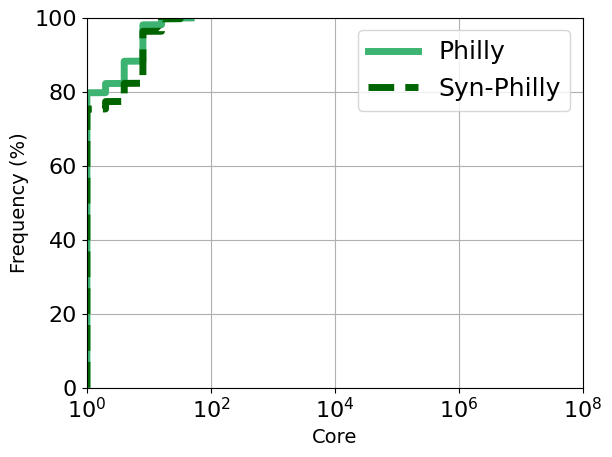

In [10]:
plot_cdf(philly_df["gpu_num"], 100000, "Core", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["gpu_num"], 100000, "Core", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

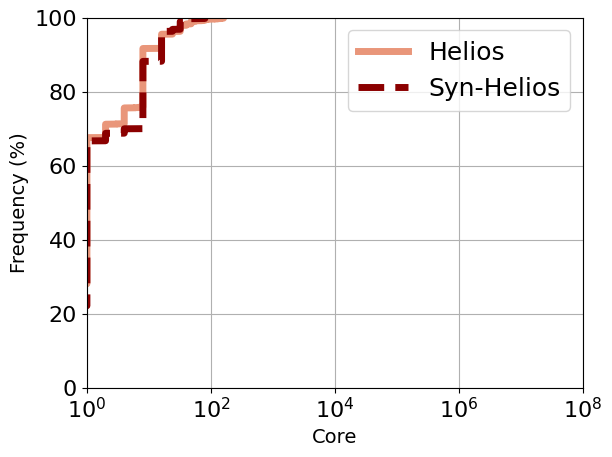

In [11]:
plot_cdf(hl_df["gpu_num"], 100000, "Core", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["gpu_num"], 100000, "Core", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

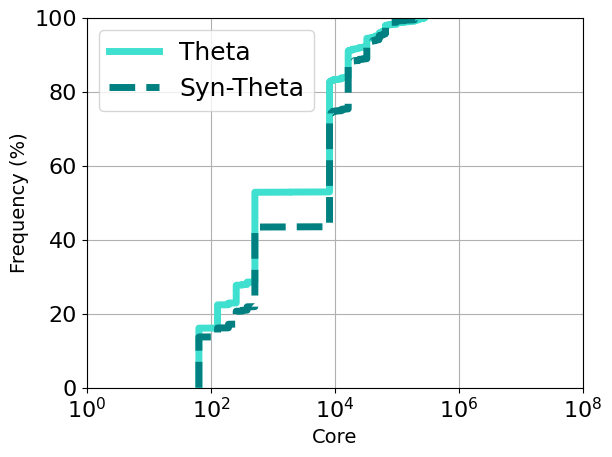

In [12]:
plot_cdf(th_df["cpu_num"], 100000, "Core", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["cpu_num"], 100000, "Core", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

#Run Time Plots

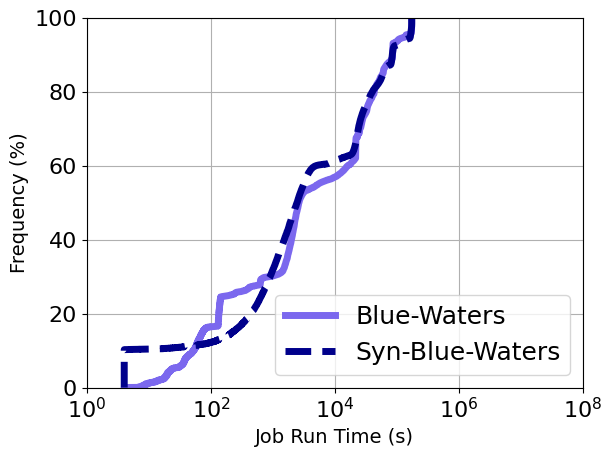

In [13]:
plt.style.use("default")
plot_cdf(bw_df["run_time"], 1000,"Job Run Time (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["run_time"], 1000,"Job Run Time (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

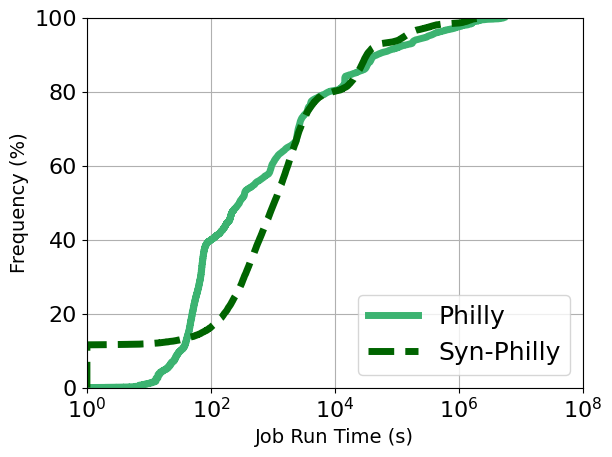

In [14]:
plt.style.use("default")
plot_cdf(philly_df["run_time"], 1000,"Job Run Time (s)", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["run_time"], 1000,"Job Run Time (s)", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

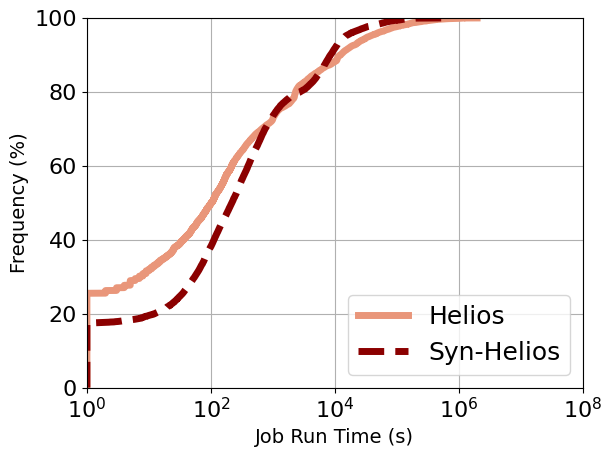

In [15]:
plt.style.use("default")
plot_cdf(hl_df["run_time"], 10009999,"Job Run Time (s)", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["run_time"], 10009999,"Job Run Time (s)", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

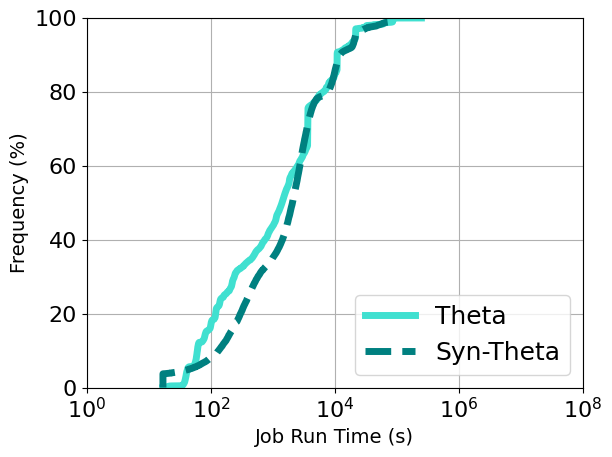

In [16]:
plt.style.use("default")
plot_cdf(th_df["run_time"], 1000, "Job Run Time (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["run_time"], 1000, "Job Run Time (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Interval Plots


In [17]:
def get_interval(a, peak=False):
    def get_time_of_day2(time):
        time = datetime.fromtimestamp(time)
        return (time.hour + (time.minute>30))%24
    if peak:
        z = a.apply(get_time_of_day2)
        b = a-a.shift(1)
        c = b[(z>=8) & (z<=17)]
        return c
    return a-a.shift(1)

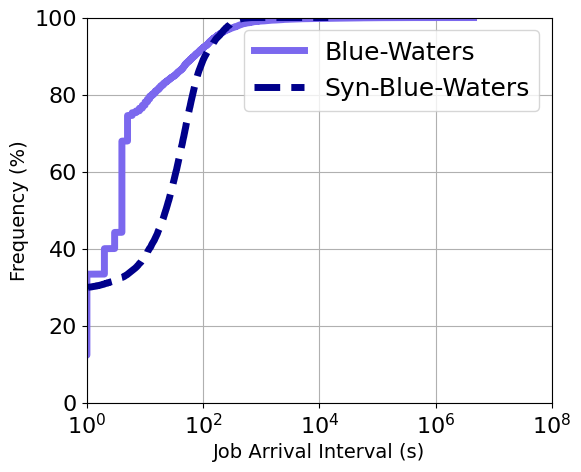

In [18]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(bw_df["interval"], 10000,"Job Arrival Interval (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["interval"], 10000,"Job Arrival Interval (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

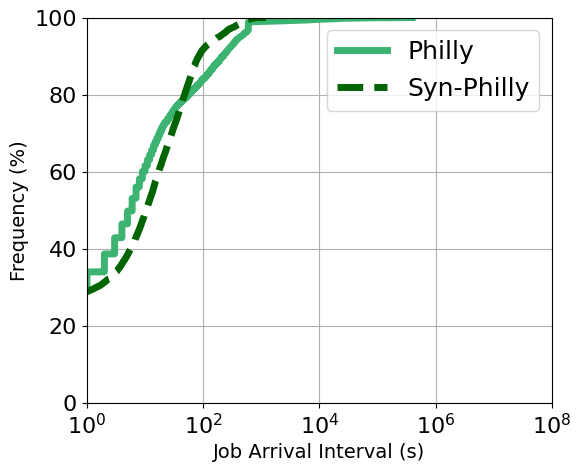

In [19]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(philly_df["interval"], 1000,"Job Arrival Interval (s)", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["interval"], 1000,"Job Arrival Interval (s)", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

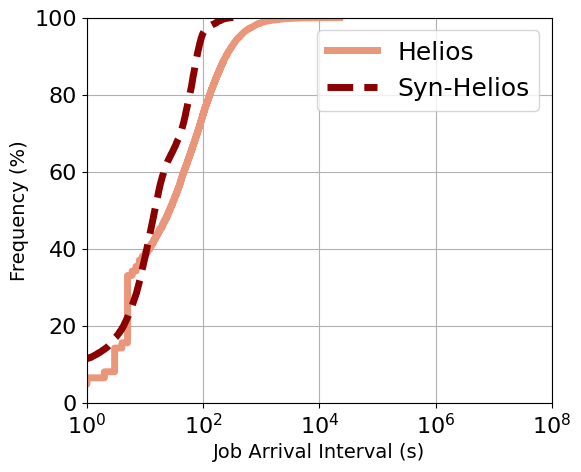

In [20]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(hl_df["interval"], 10009999,"Job Arrival Interval (s)", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["interval"], 10009999,"Job Arrival Interval (s)", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")


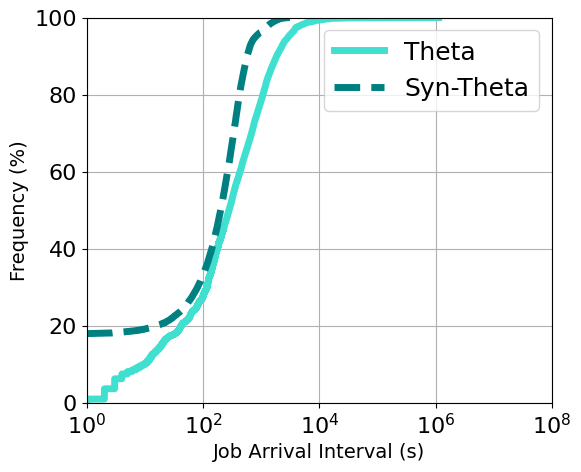

In [21]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(th_df["interval"], 100099,"Job Arrival Interval (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["interval"], 100099,"Job Arrival Interval (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# User CDF Plots

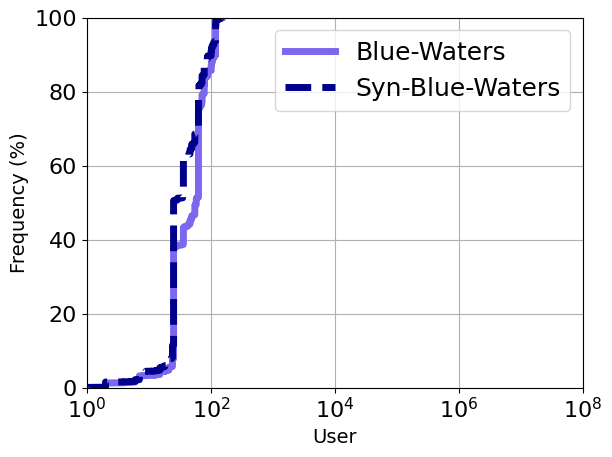

In [22]:
plt.style.use("default")
plot_cdf(bw_df["user"], 1000,"User", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["user"], 1000,"User", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

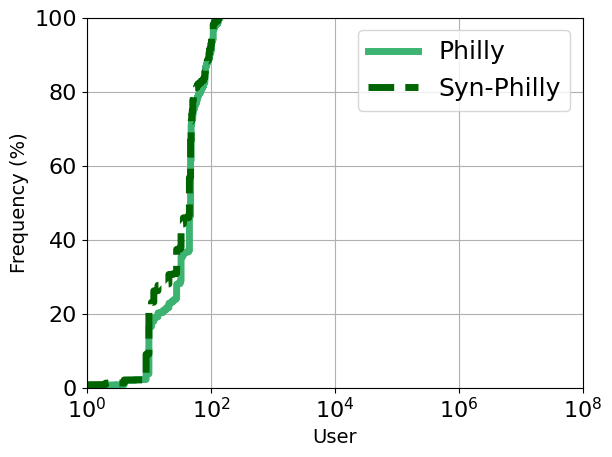

In [23]:
plt.style.use("default")
plot_cdf(philly_df["user"], 1000,"User", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["user"], 1000,"User", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

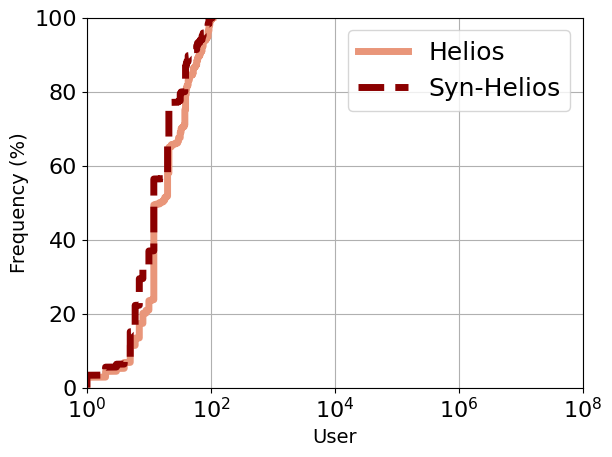

In [24]:
plt.style.use("default")
plot_cdf(hl_df["user"], 10009999,"User", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["user"], 10009999,"User", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

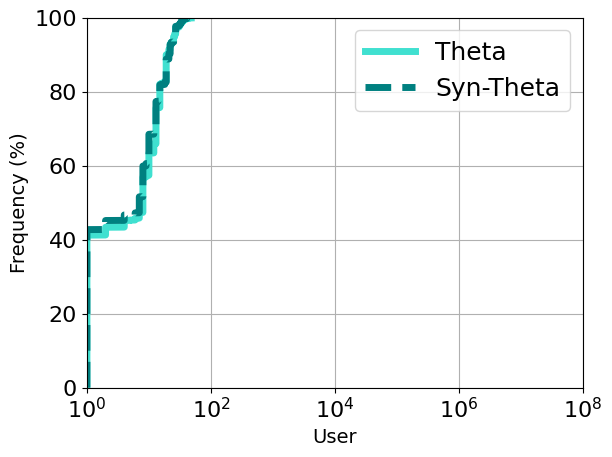

In [25]:
plt.style.use("default")
plot_cdf(th_df["user"], 1000, "User", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["user"], 1000, "User", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Wall Time Plots

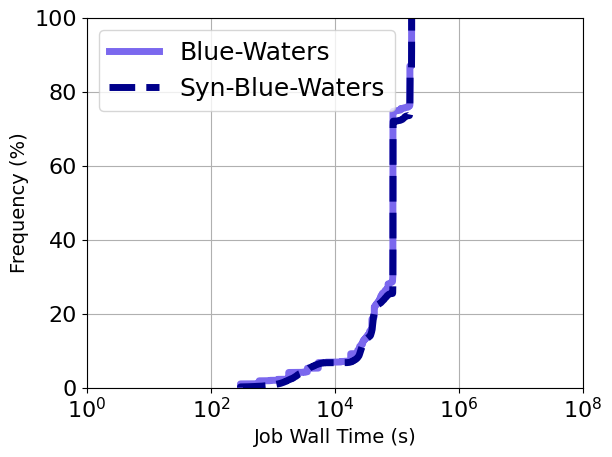

In [26]:
plt.style.use("default")
plot_cdf(bw_df["wall_time"], 1000,"Job Wall Time (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["wall_time"], 1000,"Job Wall Time (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

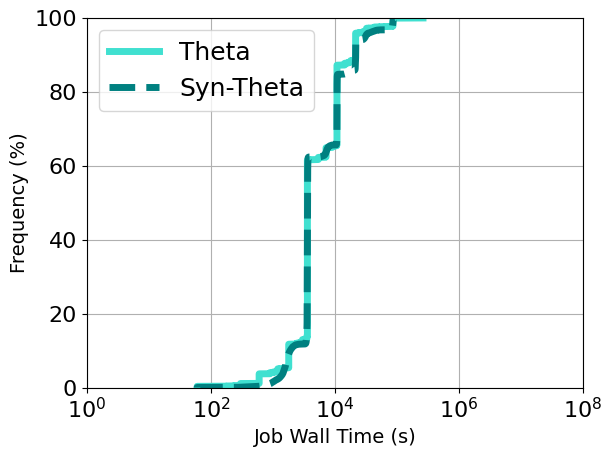

In [27]:
plt.style.use("default")
plot_cdf(th_df["wall_time"], 1000, "Job Wall Time (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["wall_time"], 1000, "Job Wall Time (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Calc Metrics

In [28]:
import argparse
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import entropy
from scipy.stats import wasserstein_distance
import os


'''
This function return a float value. It takes two data files and the interested feature as inputs.
It calculates the distance between these two datasets and outputs a quantitive value.
'''

#A simple function to create a Probability Mass Function out of a dataframe
#Takes in one dataframe as input, and outputs an array containing the probability of each unique event in each field of the dataframe
def createPMF(data):
    length = data.shape[1]
    data = data.values.tolist()
    pmf = []

    #Loop through each of the 13 categories in each job trace
    for i in range(length):
        #Find the number of unique occurences within each category
        #print(i)
        temp = []
        occurence = []
        for col in data:
          #print(col)
          if col[i] not in temp:
            temp.append(col[i])
            occurence.append(1)
            #print(col[i])
          else:
            k = temp.index(col[i])
            occurence[k] += 1

        #Divide each occurence by the total number of datapoints (counting repeats), to get the relative frequency of each element
        total = sum(occurence)
        for i in range(len(occurence)):
          occurence[i] = occurence[i] / total

        #Now add the values and their probabilities to the pmf list
        pmf.append([temp, occurence])

    return pmf

#Function to process the strings in the new_status column (needed for the corr funcs)
def preprocess(data):
    ind = 0
    for i in range(len(data['new_status'])):
        if data.loc[i, 'new_status'] == 'Pass': data.loc[i, 'new_status'] = 1
        if data.loc[i, 'new_status'] == 'Failed': data.loc[i, 'new_status'] = 0
        if data.loc[i, 'new_status'] == 'Killed': data.loc[i, 'new_status'] = -1
        ind += 1

#Function to find and return the Kulback-Leibler divergence of two csv files created using the PMF function above
#Takes in two files, outputting the KL divergences of every feature inside a dataframe
def calc_kl(file1, file2):
    #Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    kl_divs = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)
        #Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        index = df1.columns.get_loc(feature)

        # Ensure that both dists are of equal length
        if len(p) > len(q):
            n = len(p) - len(q)
            for i in range(n):
                q.append(1e-20) #Append an incredibly small number to make up for the difference in dataset length. Note that doing this rather than just shortening the sample dataset to 10000 points has little to no difference
        else:
            n = len(q) - len(p)
            for i in range(n):
                p.append(1e-20)

        # Calculate KL divergence
        kl_divs.loc[0, feature] = entropy(p, q)
    print("")
    print("------------Kulback-Leibler Divergence------------")
    print(kl_divs)


#Function to calculate the difference in correlation between a feature shared by two datasets
#Takes in two files as input, outputting a dataframe containing the % difference in the correlation coefficients of the feature in either file
#Results can be interpreted as 'the correlation coefficient of file1's feature is *calc_corr* % larger/smaller than file2's feature
def calc_corr(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    preprocess(df1)
    preprocess(df2)

    corr1 = df1.corr(numeric_only=False)
    corr2 = df2.corr(numeric_only=False)

    #Divide the two correlations to obtain the % difference, storing each entry in a new dataframe
    corr_df = pd.DataFrame(corr1 / corr2)
    print("")
    print("------------Correlation------------")
    print(corr_df)

#Function to calculate how correlated an interested feature is in two different datasets
#Takes in two files, outputting a dataframe containing the correlation coefficients that describes how correlated the features are between either dataset
def calc_corr_with(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    preprocess(df1)
    preprocess(df2)
    print("")
    print("------------Correlation Coefficients------------")
    print(df1.corrwith(df2,numeric_only=True))

#Function to calculate the hellinger distance between a feature shared by two different datasets
#Takes in two files, outputting a dataframe containing the distance metrics for each feature.
def calc_hellinger(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    hellinger = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)

        # Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        # Ensure that both dists are of equal length
        if len(p) > len(q):
            n = len(p) - len(q)
            for i in range(n):
                q.append(
                    1e-20)  # Append an incredibly small number to make up for the difference in dataset length. Note that doing this rather than just shortening the sample dataset to 10000 points has little to no difference
        else:
            n = len(q) - len(p)
            for i in range(n):
                p.append(1e-20)

        sum = 0
        for i in range(len(p)):
            sum += (np.sqrt(p[i]) - np.sqrt(q[i])) ** 2

        #print((1 / np.sqrt(2)) * np.sqrt(sum))
        hellinger.loc[0, feature] = (1 / np.sqrt(2)) * np.sqrt(sum)

    print("")
    print("------------Hellinger------------")
    print(hellinger)
    return hellinger

#Function to calculate the wasserstein distance between a feature shared by two different datasets
#Takes in two filesas input, outputting a datatframe containing distance metrics that informs us of how dissimilar all the features are
def calc_wasserstein(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    wassersteins = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)

        # Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        #print(wasserstein_distance(p, q))
        wassersteins.loc[0, feature] = wasserstein_distance(p, q)
    print("")
    print("------------Wassersteins------------")
    print(wassersteins)
    return wassersteins


# Blue Waters Calc

In [29]:
calc_kl("blue_waters_data_training.csv", "synthetic_data_tvae_bw.csv")
calc_corr("blue_waters_data_training.csv", "synthetic_data_tvae_bw.csv")
calc_corr_with("blue_waters_data_training.csv", "synthetic_data_tvae_bw.csv")
calc_hellinger("blue_waters_data_training.csv", "synthetic_data_tvae_bw.csv")
calc_wasserstein("blue_waters_data_training.csv", "synthetic_data_tvae_bw.csv")


------------Kulback-Leibler Divergence------------
  u_id        job     user  project   gpu_num   cpu_num  node_num  interval  \
0  0.0  13.705668  8.65228  5.67585  3.925994  3.501231  5.154748  6.483655   

   run_time wall_time node_hour new_status  
0  1.052329  4.980175  6.450074   0.241607  

------------Correlation------------
                  u_id         job       user    project     gpu_num  \
u_id          1.000000  762.472760 -88.485920  30.494255 -119.267029   
job         762.472760    1.000000   1.497334   0.876345    0.884193   
user        -88.485920    1.497334   1.000000   1.009781    1.535133   
project      30.494255    0.876345   1.009781   1.000000   14.230302   
gpu_num    -119.267029    0.884193   1.535133  14.230302    1.000000   
cpu_num      58.823087    1.072185   3.104383   1.379230    1.148224   
node_num     -0.737976    0.078661   0.598268   0.933373    0.484670   
interval     -4.029368    1.374847  -0.631892   2.520368   -6.892509   
run_time    -2

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0.0,0.000041,0.004016,0.009254,0.01679,0.004865,0.006492,0.001516,0.000039,0.000492,0.000075,0.019822


# Philly Calc

In [30]:
calc_kl("philly_data_training.csv", "synthetic_data_tvae_philly.csv")
calc_corr("philly_data_training.csv", "synthetic_data_tvae_philly.csv")
calc_corr_with("philly_data_training.csv", "synthetic_data_tvae_philly.csv")
calc_hellinger("philly_data_training.csv", "synthetic_data_tvae_philly.csv")
calc_wasserstein("philly_data_training.csv", "synthetic_data_tvae_philly.csv")


------------Kulback-Leibler Divergence------------
  u_id       job      user   project   gpu_num cpu_num  node_num  interval  \
0  0.0  12.19085  9.790439  1.208026  0.110696     0.0  0.057123  5.692756   

   run_time wall_time node_hour core_hour new_status  
0  2.267988       0.0  2.248536  2.110617   0.703076  

------------Correlation------------
                   u_id         job       user    project   gpu_num  cpu_num  \
u_id           1.000000  163.723057  48.660273  22.721384  1.607147      NaN   
job          163.723057    1.000000   1.021905   1.524815 -0.567342      NaN   
user          48.660273    1.021905   1.000000   1.276378 -1.547907      NaN   
project       22.721384    1.524815   1.276378   1.000000  0.684535      NaN   
gpu_num        1.607147   -0.567342  -1.547907   0.684535  1.000000      NaN   
cpu_num             NaN         NaN        NaN        NaN       NaN      NaN   
node_num     -18.533354    0.371951  -0.300339   0.596967  0.914957      NaN   
inte

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0.0,0.000043,0.006707,0.01166,0.053611,0.0,0.195276,0.001283,0.000124,0.0,0.000126,0.000118,0.009067


# Helios Calc

In [31]:
calc_kl("helios_data_training.csv", "synthetic_data_tvae_helios.csv")
calc_corr("helios_data_training.csv", "synthetic_data_tvae_helios.csv")
calc_corr_with("helios_data_training.csv", "synthetic_data_tvae_helios.csv")
calc_hellinger("helios_data_training.csv", "synthetic_data_tvae_helios.csv")
calc_wasserstein("helios_data_training.csv", "synthetic_data_tvae_helios.csv")


------------Kulback-Leibler Divergence------------
  u_id        job      user   project  gpu_num   cpu_num  node_num  interval  \
0  0.0  14.136442  7.714652  0.611227  0.62211  1.022385  0.374579  4.694256   

   run_time wall_time node_hour core_hour new_status  
0  3.550321       0.0  3.483012  3.471756   0.725323  

------------Correlation------------
                  u_id        job        user   project   gpu_num   cpu_num  \
u_id          1.000000 -46.457820 -126.530614 -3.511582 -0.421965  5.423984   
job         -46.457820   1.000000    2.035915  0.341675  0.026546 -0.368511   
user       -126.530614   2.035915    1.000000  1.240868 -0.021266  0.927766   
project      -3.511582   0.341675    1.240868  1.000000  0.812224  0.790827   
gpu_num      -0.421965   0.026546   -0.021266  0.812224  1.000000  1.226113   
cpu_num       5.423984  -0.368511    0.927766  0.790827  1.226113  1.000000   
node_num      5.272027  -0.641969    0.981380  0.734326  1.089569  1.162456   
interval

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0.0,0.000043,0.013477,0.011165,0.047619,0.029252,0.096437,0.001003,0.000157,0.0,0.000146,0.000122,0.0332


# Theta Calc

In [32]:
calc_kl("theta_data_training.csv", "synthetic_data_tvae_theta.csv")
calc_corr("theta_data_training.csv", "synthetic_data_tvae_theta.csv")
calc_corr_with("theta_data_training.csv", "synthetic_data_tvae_theta.csv")
calc_hellinger("theta_data_training.csv", "synthetic_data_tvae_theta.csv")
calc_wasserstein("theta_data_training.csv", "synthetic_data_tvae_theta.csv")


------------Kulback-Leibler Divergence------------
  u_id        job      user   project gpu_num   cpu_num  node_num  interval  \
0  0.0  14.846027  0.922508  1.029007     0.0  5.415071  5.317338  2.550028   

   run_time wall_time node_hour new_status  
0  0.129423   7.68984  5.163033   0.252169  

------------Correlation------------
                  u_id        job       user    project  gpu_num    cpu_num  \
u_id          1.000000 -95.721563 -13.198118 -11.490104      NaN  25.171387   
job         -95.721563   1.000000   1.252980   1.230903      NaN  -2.330150   
user        -13.198118   1.252980   1.000000   1.028227      NaN   1.155771   
project     -11.490104   1.230903   1.028227   1.000000      NaN   1.120832   
gpu_num            NaN        NaN        NaN        NaN      NaN        NaN   
cpu_num      25.171387  -2.330150   1.155771   1.120832      NaN   1.000000   
node_num      9.556443  -2.206101   1.108778   1.076544      NaN   1.034963   
interval     -7.150097  -0.193

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0.0,0.000047,0.007934,0.008006,0.0,0.005717,0.005162,0.000288,0.000009,0.009367,0.000016,0.036178
